<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/simple_linear_regression/02_python_course_sklearn_intro_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Scikit learn introduction with linear regression

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('Advertising.csv')

In [5]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


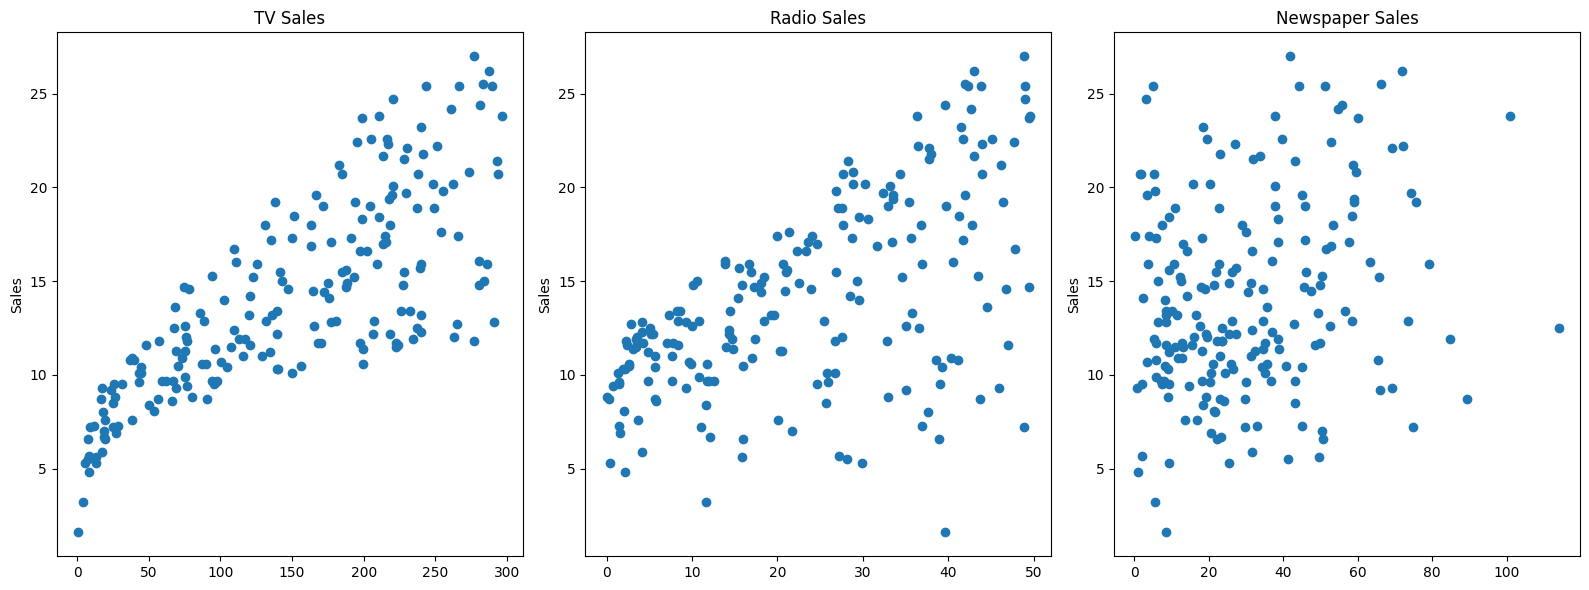

In [6]:
#see relationship between TV radio newspaper with sales
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(16,6))
axes[0].plot(df['TV'],df['sales'],'o')
axes[0].set_title('TV Sales')
axes[0].set_ylabel('Sales')

axes[1].plot(df['radio'],df['sales'],'o')
axes[1].set_title('Radio Sales')
axes[1].set_ylabel('Sales')

axes[2].plot(df['newspaper'],df['sales'],'o')
axes[2].set_title('Newspaper Sales')
axes[2].set_ylabel('Sales')
plt.tight_layout()

In [7]:
#create features and dependent variable
X = df.drop('sales',axis=1)
y = df['sales']

In [8]:
#create a train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=42)

In [9]:
#creating a linear regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)
test_predictions = model.predict(X_test)

In [10]:
#performance evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error
mae = mean_absolute_error(y_test,test_predictions)
print(mae)

1.5116692224549086


In [11]:
mse = mean_squared_error(y_test,test_predictions)
print(mse)

3.79679723671522


In [12]:
rmse = np.sqrt(mse)
print(rmse)

1.9485372043446387
